First install the repo and requirements.

In [ ]:
%pip --quiet install git+https://github.com/mfinzi/equivariant-MLP.git

# Combining Representations from Different Groups (experimental)
## Direct Product groups

It is possible to combine representations from different groups. These kinds of representations are relevant when there are multiple structures in the data. For example, a point cloud is a set of vectors which transforms both under permutations and rotations of the vectors. We can formalize this as $V_{S_n}\otimes V_{SO(3)}$ or in tensor notation $T_1^{S_n}\otimes T_1^{SO(3)}$. While this object could be expressed as the representation of the product group $V_{S_n \times SO(3)}$, other objects like $T_k^{S_n}\otimes T_j^{SO(3)}$ can not be so easily.

Nevertheless, we can calculate the symmetric bases for these objects. For example, maps from vector edge features $T_1^{SO(3)}\otimes T_2^{S_n}$ to matrix node features $T_2^{SO(3)}\otimes T_1^{S_n}$ can be computed:

In [1]:
from emlp.groups import *
from emlp.reps import T,vis,V,Scalar

repin,repout = T(1)(SO(3))*T(2)(S(4)),T(2)(SO(3))*T(1)(S(4))
print(repin,"-->", repout)

V_SO(3)⊗V²_S(4) --> V²_SO(3)⊗V_S(4)


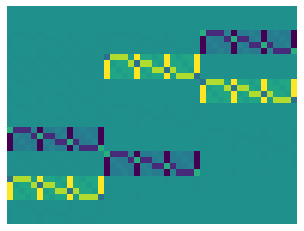

In [7]:
vis(repin,repout,cluster=False)

Or perhaps you would like equivariant maps from two sequence of sets and a matrix (under 3D rotations) to itself. You can go wild.

In [2]:
rep = 2*T(1)(Z(3))*T(1)(S(4))+T(2)(SO(3))
print(f"Rep: {rep}")
print(f"Linear maps: {rep>>rep}")

Rep: V²+2V_S(4)⊗V_Z(3)
Linear maps: V⁴+4V_S(4)⊗V_Z(3)⊗V²_SO(3)+4V²_S(4)⊗V²_Z(3)


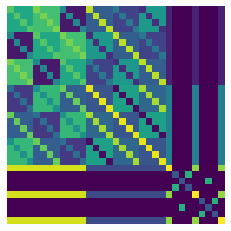

In [7]:
vis(rep,rep)

The kronecker product of the individual solutions for different groups can be seen in these basis matrices, in the top left hand corner we have a circulant matrix of deep set solutions (identity + background)

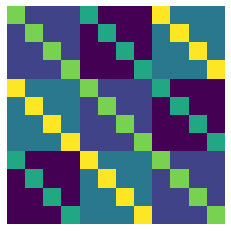

In [3]:
vis(V(Z(3))*V(S(4)),V(Z(3))*V(S(4)))

And in the bottom left we have maps $V_{Z_3}\otimes V_{S_4} \rightarrow V_{SO(2)}^{\otimes 2}$ of which the solutions are the product of $V_{Z_3}\otimes V_{S_4} \rightarrow \mathbb{R}$ (the vector $\mathbf{1}$) and $\mathbb{R} \rightarrow V_{SO(2)}^{\otimes 2}$ (the flattened $I_{3\times 3}$)

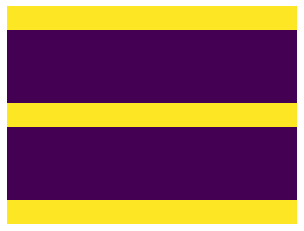

In [5]:
vis(V(Z(3))*V(S(4)),T(2)(SO(3)),False)

## Wreath Products (coming soon)

These are all examples of tensor products of representations, which are in turn a kind of representation on the direct product group $G=G_1\times G_2$. There are other ways of combining groups however, and for many hierarchical structures there is a larger group of symmetries $G_1\wr G_2$ that contains $G_1 \times G_2$ but also other elements. These so called wreath products in the very nice paper [Equivariant Maps for Hierarchical Structures](https://arxiv.org/pdf/2006.03627.pdf). Support for the wreath product of representations is not yet implemented but if this is something that would be useful to you, send me an email.